In [1]:
import pandas as pd

# Load the training and test dataset

train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")


print(train_data.head())
train_data['damage'].value_counts()


          ID damage                                      filename
0  ID_UBHORS     WD  d036341be8d6cd59851cb80bcc9a70cc9fbdba30.jpg
1  ID_9DSOLZ      G  9ea16180c50d0cd539897eefbfe585314e50a56b.jpg
2  ID_JHLM0G      G  b6b564844041bc68774a553eaf43d61654657dd9.jpg
3  ID_ATREIJ     DR  62262859f0cd411aaf484082ed3ef0b625bc452a.jpg
4  ID_L2GAD6      G  03b6e2a8ace7cb611eccba289f3c83d9bd497584.jpg


damage
G        11623
WD        9238
DR        4516
other      419
ND         272
Name: count, dtype: int64

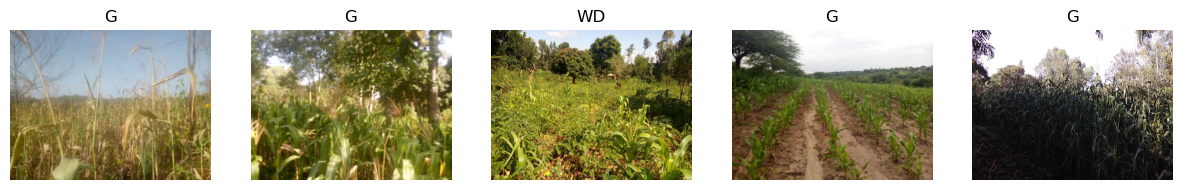

In [2]:
import matplotlib.pyplot as plt
import cv2

# Display a few sample images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Assuming the column name is 'filename', replace it with the actual column name in your dataset
image_column_name = 'filename'

for i, (idx, row) in enumerate(train_data.sample(5).iterrows()):
    img_path = f"C:\\Users\\yashr\\OneDrive\\Desktop\\minor_project\\images\\images\\{row[image_column_name]}"
    img = cv2.imread(img_path)
    
    # Check if the image is successfully loaded
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].set_title(row['damage'])
        axes[i].axis('off')
    else:
        print(f"Error reading image: {img_path}")

plt.show()


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data Generator
train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='C:\\Users\\yashr\\OneDrive\\Desktop\\minor_project\\images\\images',
    x_col='filename',
    y_col='damage',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Print class indices for reference
print(train_generator.class_indices)



Found 26068 validated image filenames belonging to 5 classes.
{'DR': 0, 'G': 1, 'ND': 2, 'WD': 3, 'other': 4}


In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Convert target variable to one-hot encoded format
train_data['damage'] = pd.Categorical(train_data['damage'])
train_data['damage_code'] = train_data['damage'].cat.codes
train_data['damage_onehot'] = train_data['damage_code']  # Use the categorical codes
train_data['damage_onehot'] = to_categorical(train_data['damage_onehot'], num_classes=5)  # Assuming 5 classes

# Split the dataset into training and validation sets
train_set, val_set = train_test_split(train_data, test_size=0.2, random_state=42)

# Data Generators
train_generator = datagen.flow_from_dataframe(
    dataframe=train_set,
    directory='C:\\Users\\yashr\\OneDrive\\Desktop\\minor_project\\images\\images',
    x_col='filename',
    y_col='damage',  # Use the actual class column
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_set,
    directory='C:\\Users\\yashr\\OneDrive\\Desktop\\minor_project\\images\\images',
    x_col='filename',
    y_col='damage',  # Use the actual class column
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 20854 validated image filenames belonging to 5 classes.
Found 5214 validated image filenames belonging to 5 classes.


In [9]:
# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust as needed
    validation_data=val_generator,
    callbacks=[early_stopping]
)

Epoch 1/10
652/652 [==============================] - 1588s 2s/step - loss: 1.1356 - accuracy: 0.4506 - val_loss: 1.0521 - val_accuracy: 0.5023
Epoch 2/10
652/652 [==============================] - 1454s 2s/step - loss: 1.0546 - accuracy: 0.5033 - val_loss: 1.0155 - val_accuracy: 0.5491
Epoch 3/10
652/652 [==============================] - 1415s 2s/step - loss: 1.0218 - accuracy: 0.5384 - val_loss: 0.9761 - val_accuracy: 0.5660
Epoch 4/10
652/652 [==============================] - 1372s 2s/step - loss: 0.9996 - accuracy: 0.5574 - val_loss: 0.9743 - val_accuracy: 0.5690
Epoch 5/10
652/652 [==============================] - 1469s 2s/step - loss: 0.9754 - accuracy: 0.5760 - val_loss: 0.9456 - val_accuracy: 0.6078
Epoch 6/10
652/652 [==============================] - 1377s 2s/step - loss: 0.9544 - accuracy: 0.5866 - val_loss: 1.0205 - val_accuracy: 0.5522
Epoch 7/10
652/652 [==============================] - 1408s 2s/step - loss: 0.9371 - accuracy: 0.6004 - val_loss: 0.9454 - val_accuracy:

In [14]:
train_data


,ID,damage,filename,damage_code,damage_onehot
0,ID_UBHORS,WD,d036341be8d6cd59851cb80bcc9a70cc9fbdba30.jpg,3,0.0
1,ID_9DSOLZ,G,9ea16180c50d0cd539897eefbfe585314e50a56b.jpg,1,0.0
2,ID_JHLM0G,G,b6b564844041bc68774a553eaf43d61654657dd9.jpg,1,0.0
3,ID_ATREIJ,DR,62262859f0cd411aaf484082ed3ef0b625bc452a.jpg,0,1.0
4,ID_L2GAD6,G,03b6e2a8ace7cb611eccba289f3c83d9bd497584.jpg,1,0.0
...,...,...,...,...,...
26063,ID_SQQ5T2,DR,dd3f7966864f9466b9d57714983c3259c905f1e7.jpg,0,1.0
26064,ID_T5WAM0,G,cab5d10958f28b17d887748f9cd1d35796db0902.jpg,1,0.0
26065,ID_9W6G7O,G,7feedaf352fe16b24454fc4ee283bb85c3f17ccb.jpg,1,0.0
26066,ID_YQ07UW,G,f295f949ece1867921363df9e4c3d17e8d7fc22f.jpg,1,0.0


In [ ]:
# # Generate predictions on the test set
# predictions = model.predict(test_generator)

# # Assuming 'SampleSubmission.csv' contains the sample submission format
# submission_df = pd.read_csv('/kaggle/input/cgiar-crop-damage/CGIAR/SampleSubmission.csv')

# # Assign predictions to the corresponding columns in the submission file
# submission_df[['DR', 'G', 'ND', 'WD', 'Other']] = predictions

# # Save the submission file with predictions
# submission_df.to_csv('submission_with_predictions.csv', index=False)


In [ ]:

# submission_df

In [25]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')


163/163 [==============================] - 209s 1s/step - loss: 0.8144 - accuracy: 0.6759
Validation Loss: 0.8143929839134216, Validation Accuracy: 0.6758726239204407


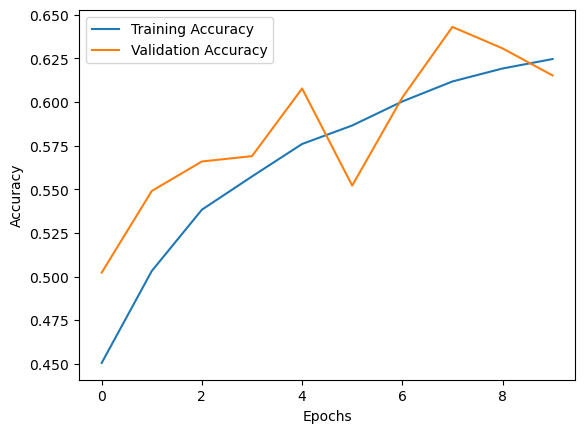

In [26]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


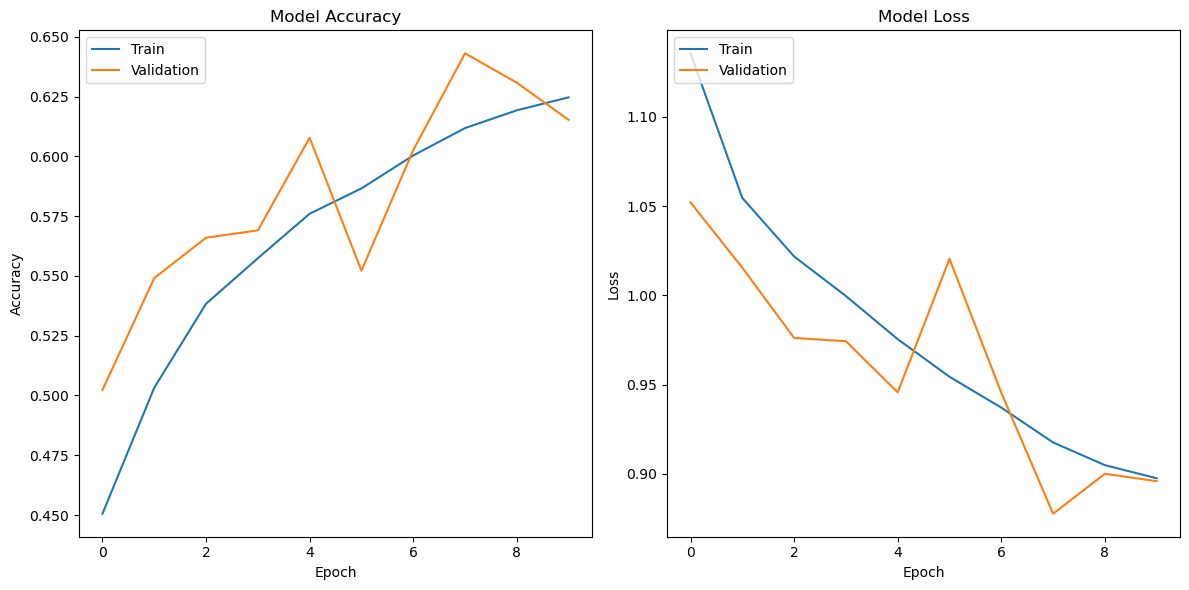

In [28]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


163/163 [==============================] - 198s 1s/step


c:\Users\yashr\anaconda3\envs\ABC\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yashr\anaconda3\envs\ABC\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yashr\anaconda3\envs\ABC\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

          DR       0.19      0.20      0.19       942
           G       0.45      0.44      0.45      2305
          ND       0.00      0.00      0.00        62
          WD       0.35      0.38      0.36      1812
       other       0.00      0.00      0.00        93

    accuracy                           0.36      5214
   macro avg       0.20      0.20      0.20      5214
weighted avg       0.35      0.36      0.36      5214



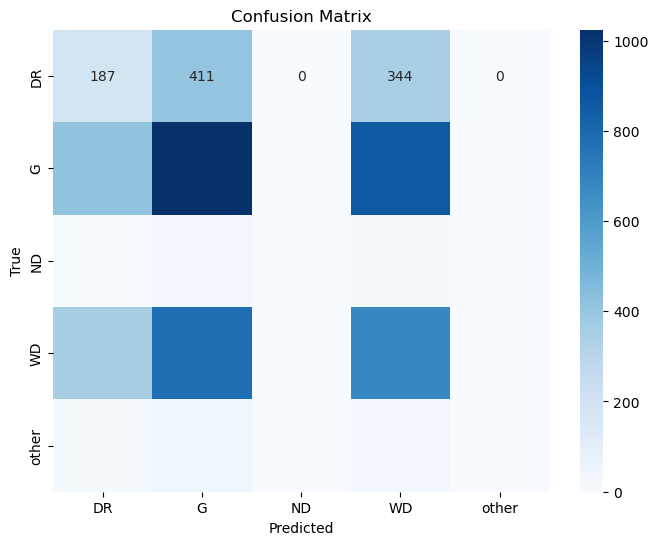

In [34]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
# Evaluate the model on the validation set
val_predictions = model.predict(val_generator)
val_predicted_labels = np.argmax(val_predictions, axis=1)
val_true_labels = val_generator.classes

# Calculate precision, recall, and F1-score
report = classification_report(val_true_labels, val_predicted_labels, target_names=train_generator.class_indices)
print('Classification Report:\n', report)

# Plot confusion matrix
conf_matrix = confusion_matrix(val_true_labels, val_predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Saving the model

In [37]:
from tensorflow.keras.models import save_model

model.save('C:\\Users\\yashr\\OneDrive\\Desktop\\minor_project\\trained_model.h5')

In [38]:

import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np

# Load the test dataset
test_data = pd.read_csv("Test.csv")

# Assuming the model is already trained and saved
# Load the trained model
trained_model = load_model('C:\\Users\\yashr\\OneDrive\\Desktop\\minor_project\\trained_model.h5')

# Preprocess the test data
test_datagen = image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    directory='C:\\Users\\yashr\\OneDrive\\Desktop\\minor_project\\images\\images',
    x_col='filename',
    y_col=None,  # Since it's a test set, 'y_col' can be None
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,  # Again, set to None for a test set
    shuffle=False  # Do not shuffle the test data
)

# Make predictions on the test data
predictions = trained_model.predict(test_generator)

# Assuming your model outputs probabilities for each class
# Convert the probabilities to predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Map predicted labels back to the original class names
class_mapping = {0: 'DR', 1: 'G', 2: 'ND', 3: 'other', 4: 'WD'}
predicted_damage = [class_mapping[label] for label in predicted_labels]

# Add the predicted labels to the test_data DataFrame
test_data['predicted_damage'] = predicted_damage

# Save the test_data DataFrame with predictions to a CSV file
test_data.to_csv('C:\\Users\\yashr\\OneDrive\\Desktop\\minor_project\\test_predictions.csv', index=False)


Found 8663 validated image filenames.
271/271 [==============================] - 313s 1s/step


In [39]:
# Output
test_data

,ID,filename,predicted_damage
0,ID_QW9GQM,03428805a0d7d269b422dbfafb3f86cb394a0491.jpg,G
1,ID_G9VPQ9,5dcf4f5d82708496ad7c3227ccbc8af5058aa227.jpg,G
2,ID_QIMIEM,4e835aa40e4aafa24db13cba4182094eb9e5eb79.jpg,G
3,ID_TSINUQ,1e0dbb8669385be73a480ce108d12bdc4354f120.jpg,G
4,ID_I7OOHH,3d05e31502f9f00ce25770666c73af5f323a8b3a.jpg,DR
...,...,...,...
8658,ID_JZJP19,8b58a11023be5530af0fd1800b2c53c36f50605f.jpg,G
8659,ID_137G9B,2d3c4c70b893bf32c33919e5c1703b816b95a6d9.jpg,other
8660,ID_F7R60Y,49d9c6cadb9a424fc31aff1d6732023235e6ceb7.jpg,other
8661,ID_76JGLU,618f93ddbb02e2abf4b97ac458b2c2e727c2e0a4.jpg,other
